In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Showing The Data

In [2]:
data_df = pd.read_csv("007-02.csv")


print(data_df.shape)
data_df.head(10)

(99, 4)


,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
5,75,68,68,63
6,66,59,55,65
7,77,71,66,73
8,70,71,60,67
9,89,84,80,85


# Describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
Pysics        99 non-null int64
Science       99 non-null int64
Statistics    99 non-null int64
Math          99 non-null int64
dtypes: int64(4)
memory usage: 3.2 KB
None
          Pysics    Science  Statistics       Math
count  99.000000  99.000000   99.000000  99.000000
mean   74.868687  74.515152   74.010101  75.070707
std     8.528041   9.912231   11.036576  11.469794
min    60.000000  54.000000   55.000000  52.000000
25%    68.000000  67.000000   66.500000  67.000000
50%    74.000000  75.000000   75.000000  74.000000
75%    82.000000  83.000000   81.000000  83.500000
max    90.000000  97.000000  100.000000  99.000000


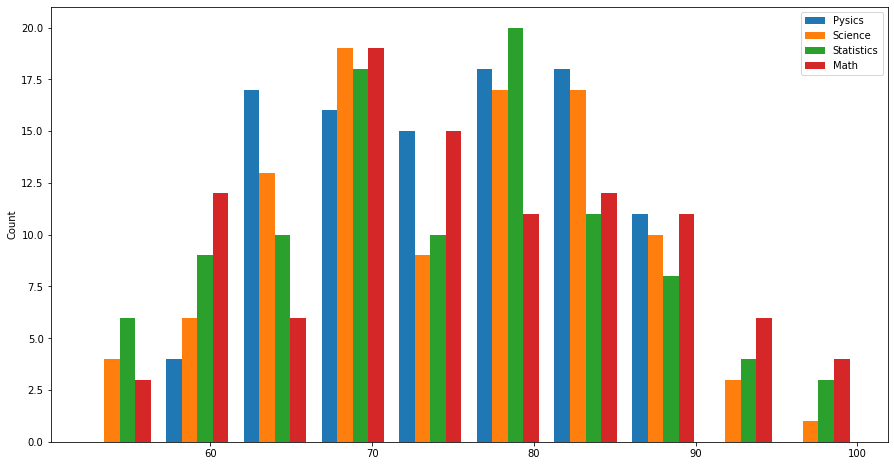

In [3]:
print(data_df.info())
print(data_df.describe())

#This is for Each Data coloumns
pysc = data_df['Pysics']
sci = data_df['Science']
stat = data_df['Statistics']
math = data_df['Math']

plt.figure(figsize=(15,8))
plt.hist([pysc, sci, stat, math], label=['Pysics', 'Science', 'Statistics', 'Math'])
plt.legend(loc='upper right')
plt.ylabel("Count")

plt.show()

first thing that we should know before analyze our data, are find a null item and specious data. for example like a data have shown as numeric but while we are going to use it for some function algorithem, the scrpit has a syntax erorr caused by a kind of data like Object even a string.

We can see from the result of "info" function from Pandas, there are no null items and integer.

the result of "describe" function from pandas, we can see that almost all the atribute have a common in mean calculation. But we can conlude, Math has the longest range atribute data from the bigest Std value. And every atribute have differences.

Next step we are going to see how are the data distributed. from value of std "describe "function", math has a big plot.

In [4]:
# calculate the number of class
PBins = (90-60)*(99**(1/3))/(3.49*8.528041)
PBins = round(PBins)

ScBins = (97-54)*(99**(1/3))/(3.49*9.912231)
ScBins = round(ScBins)

StBins = (90-60)*(99**(1/3))/(3.49*11.036576)
StBins = round(StBins)

MBins = (90-60)*(99**(1/3))/(3.49*11.469794)
MBins = round(MBins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A182B9BC8>]],
      dtype=object)

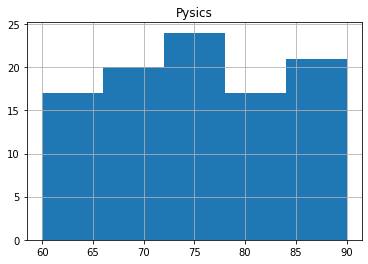

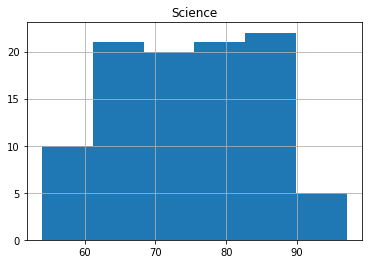

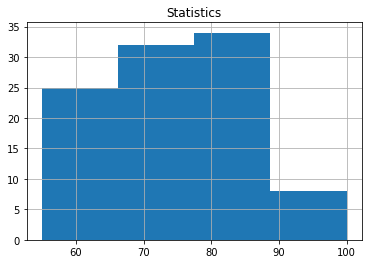

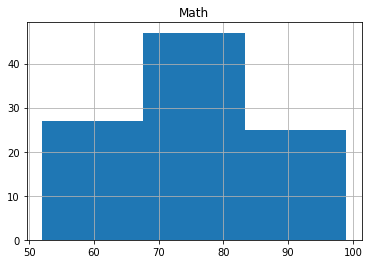

In [5]:
data_df.hist('Pysics', bins=PBins)
data_df.hist('Science', bins=ScBins)
data_df.hist('Statistics', bins=StBins)
data_df.hist('Math', bins=MBins)

Expecting the number of bins has significant impact on approximating the true underlying distribution by calculate it that refered from Scott 1979. We can see every plots have characteristics distribution plot.

we can conlude that Math and Science are defining Normal distibution plot, Statistics is difining a Binomial Distribution because the data leaning to the left.

when we are done with these, we need to see how are the kernel.

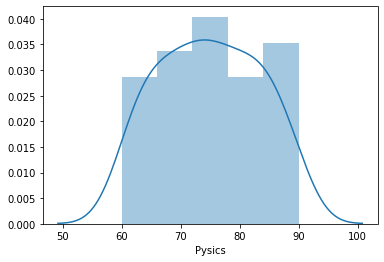

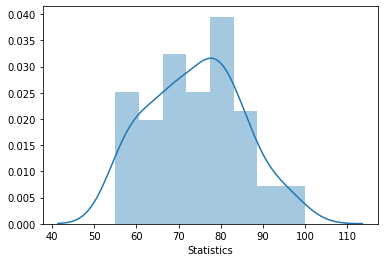

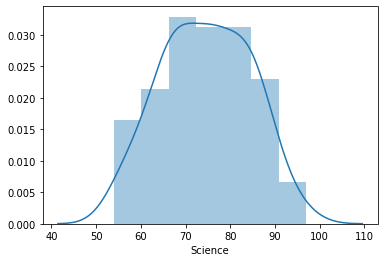

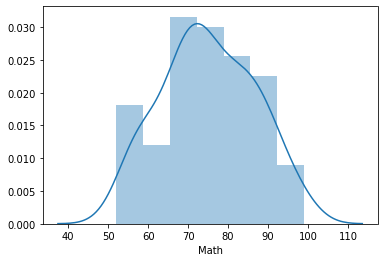

In [6]:
import scipy
from scipy import stats
import seaborn as sns

plt.figure()
sns.distplot(pysc)
plt.figure()
sns.distplot(stat)
plt.figure()
sns.distplot(sci)
plt.figure()
sns.distplot(math)

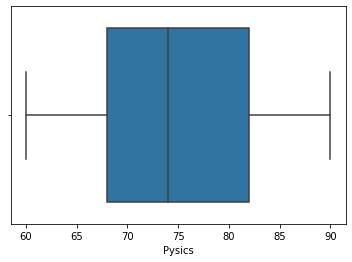

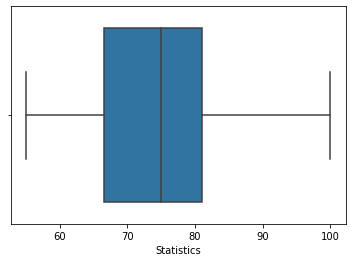

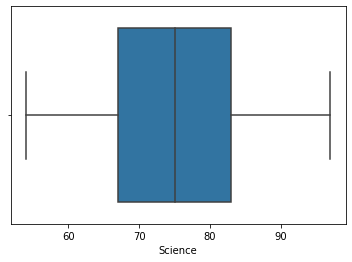

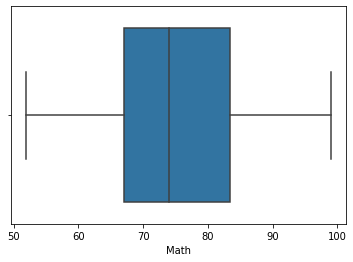

In [7]:
plt.figure()
sns.boxplot(pysc)
plt.figure()
sns.boxplot(stat)
plt.figure()
sns.boxplot(sci)
plt.figure()
sns.boxplot(math)

We can see, all off the data are not having oulier. All the data well distributed. also, we can conclude that Statitics atribute has a long tail to the right. Now, its time to do normality test.

# Probability Plot Normal Distribution

NormaltestResult(statistic=20.41228864514883, pvalue=3.694263246105147e-05)


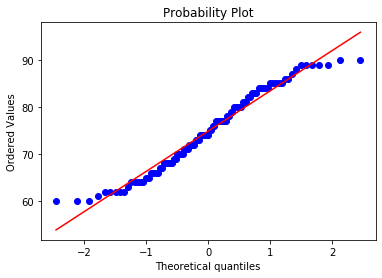

In [8]:
plt.figure()
plt.title('Probability Plot Pysics')
PP_P = stats.probplot(pysc, plot=plt)
print(scipy.stats.normaltest(pysc))


Form the Probability Plot, the data does not follow a straight line compeletely. If we Asume the Alpha is 0.05, we can see the Pvalue from the Normal Test Result is 3.694263246105147e-05. Which means Pvalue < Alpha. The conlusion for the Pysics Data is not Normal Distribution.

NormaltestResult(statistic=5.266775468436027, pvalue=0.07183469271218126)


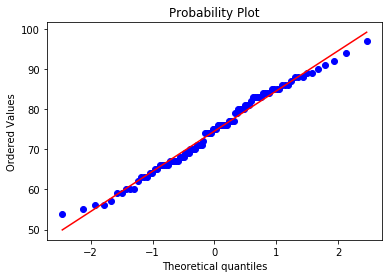

In [9]:
plt.figure()
plt.title('Probability Plot Science')
PP_Sci = stats.probplot(sci, plot=plt)
print(scipy.stats.normaltest(sci))

NormaltestResult(statistic=3.629466005093682, pvalue=0.16288139150169662)


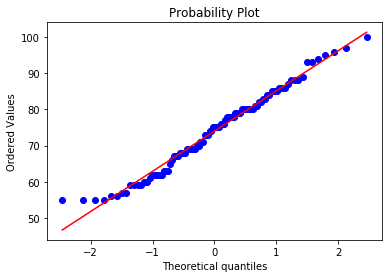

In [10]:
plt.figure()
plt.title('Probability Plot Statistics')
PP_stat = stats.probplot(stat, plot=plt)
print(scipy.stats.normaltest(stat))

NormaltestResult(statistic=5.464382315098785, pvalue=0.06507654037940966)


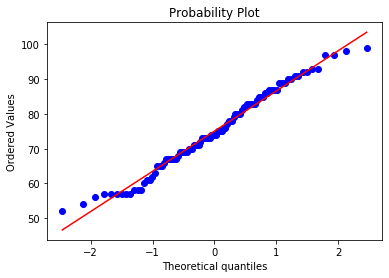

In [11]:
plt.figure()
plt.title('Probability Plot Math')
PP_M = stats.probplot(math, plot=plt)
print(scipy.stats.normaltest(math))

# Correlation

In [12]:
columns = ['Pysics', 'Science', 'Statistics', 'Math']
subset = data_df[columns]


# Compute the correlation matrix
print(subset.corr())
cor_result = subset.corr()


              Pysics   Science  Statistics      Math
Pysics      1.000000  0.872113    0.772690  0.812438
Science     0.872113  1.000000    0.827213  0.904023
Statistics  0.772690  0.827213    1.000000  0.823174
Math        0.812438  0.904023    0.823174  1.000000


In [13]:
# Covariance Pysics and Science Analysis 
print(np.cov(data_df['Pysics'], data_df['Science']))

[[72.72747887 73.72139765]
 [73.72139765 98.25231911]]


# Simple Regression

As we can see from the matrix correlation, the biggest correlation is Math with Science. for Furthure analyzing, i am going to make a simple regression between Math and Science.

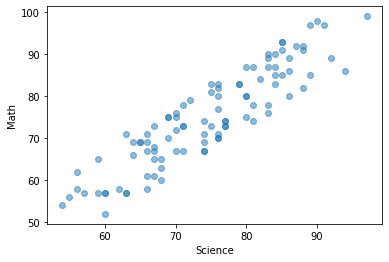

In [14]:
subset = data_df.dropna(subset=['Science', 'Math'])
xs = subset['Science']
ys = subset['Math']
plt.xlabel('Science')
plt.ylabel('Math')
plt.scatter(xs, ys, alpha=0.5)

In [15]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
x_SL = np.asanyarray(data_df[['Statistics']])
y_SL = np.asanyarray(data_df[['Math']])
regr.fit (x_SL, y_SL)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.85548613]]
Intercept:  [11.75609217]


# Multiple Regression

if we look carefully from the matrix corelation, Science has several variables with high correlation values.

In [16]:
cor_result.describe()

,Pysics,Science,Statistics,Math
count,4.000000,4.000000,4.000000,4.000000
mean,0.864310,0.900837,0.855769,0.884909
std,0.099260,0.073232,0.099302,0.086938
min,0.772690,0.827213,0.772690,0.812438
25%,0.802501,0.860888,0.810553,0.820490
50%,0.842276,0.888068,0.825194,0.863599
75%,0.904085,0.928017,0.870410,0.928017
max,1.000000,1.000000,1.000000,1.000000


Also we can see from the mean value that science has the highest mean correlation. The next step is do a multiple regression analysis.

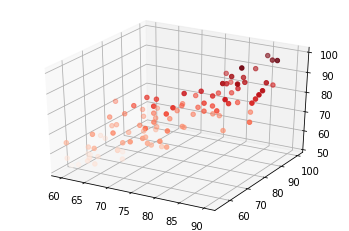

In [17]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = data_df['Pysics']
ydata = data_df['Statistics']
zdata = data_df['Math']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [18]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
train_x = np.asanyarray(data_df[['Pysics','Statistics','Math']])
train_y = np.asanyarray(data_df[['Science']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.4205578  0.12660935 0.42693007]]
Intercept:  [1.60822839]


Now, we can make the model prediction for Science.

Science = Intercept + Coefficient1 X1 + Coefficient2 X2 + Coefficient3 X3

Science = 1.608 + 0.420 X1 + 0.126 X2 + 0.426 X3

Science = 1.608 + 0.420 Pysics + 0.126 Statistics + 0.426 Math